In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

### 1. Data Understanding & Preparation

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [3]:
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


In [4]:
print("Unique values for total_assignments:", df['total_assignments'].unique())
print("Unique values for total_lectures:", df['total_lectures'].unique())
print("Unique values for total_lab_sessions:", df['total_lab_sessions'].unique())

Unique values for total_assignments: [5]
Unique values for total_lectures: [12]
Unique values for total_lab_sessions: [6]


In [5]:
columns_to_drop = ['student_id', 'name', 'assignments_submitted', 'total_assignments', 'total_lectures', 'total_lab_sessions']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


In [6]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


In [7]:
df_cleaned.describe()

,age,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,21.550000,7.254667,5.866667,5.469000,19.969000,37.375000,2.806033,6.013333,3.110000
std,2.241483,1.611791,2.414786,2.711083,8.272229,11.796774,0.732694,3.726407,1.982676
min,18.000000,2.800000,0.000000,0.000000,0.000000,0.000000,0.610000,0.000000,0.000000
25%,20.000000,6.075000,4.000000,3.600000,14.225000,29.875000,2.327500,3.000000,1.000000
50%,22.000000,7.300000,5.800000,5.600000,21.350000,39.600000,2.800000,6.000000,3.000000
75%,23.000000,8.400000,7.700000,7.200000,27.425000,49.550000,3.320000,9.000000,5.000000
max,25.000000,10.000000,10.000000,10.000000,30.000000,50.000000,4.000000,12.000000,6.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

# Re-initialize df_encoded from df to ensure original 'ocean_proximity' column is present
df_encoded = df_cleaned.copy()

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to the 'ocean_proximity' column
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])

# Display the head of the transformed DataFrame to verify
df_encoded.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,1,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,1,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,0,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,1,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,0,5.9,6.3,2.0,23.8,31.0,2.53,7,4


### Exploratory Data Analysis (EDA)

Visualize numeric variables

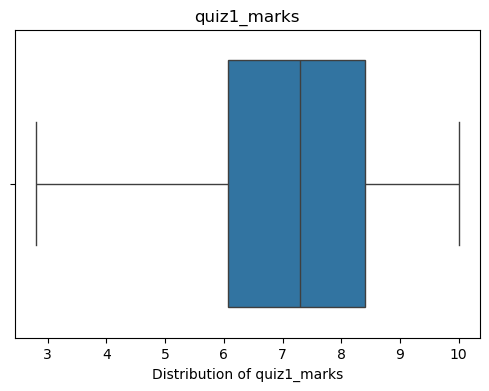

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_encoded['quiz1_marks'])
plt.title('quiz1_marks')
plt.xlabel('Distribution of quiz1_marks')
plt.show()

# From the boxplot for column quiz1_marks, most of the scores 
# are around 6-8 with a minimum score of 3 and maximum score of 10
# there are also no outliers.

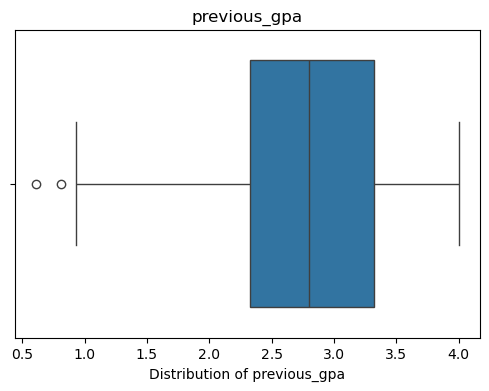

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_encoded['previous_gpa'])
plt.title('previous_gpa')
plt.xlabel('Distribution of previous_gpa')
plt.show()

# From the boxplot for column previous_gpa, most of the student's
# GPA are around 2.4 to 3.4 with a maximum score of 4.0 and minimum
# score of 1.0 but there are two outliers spotted, where there GPA 
# is less than 1.0.

2 Insightful Visualization

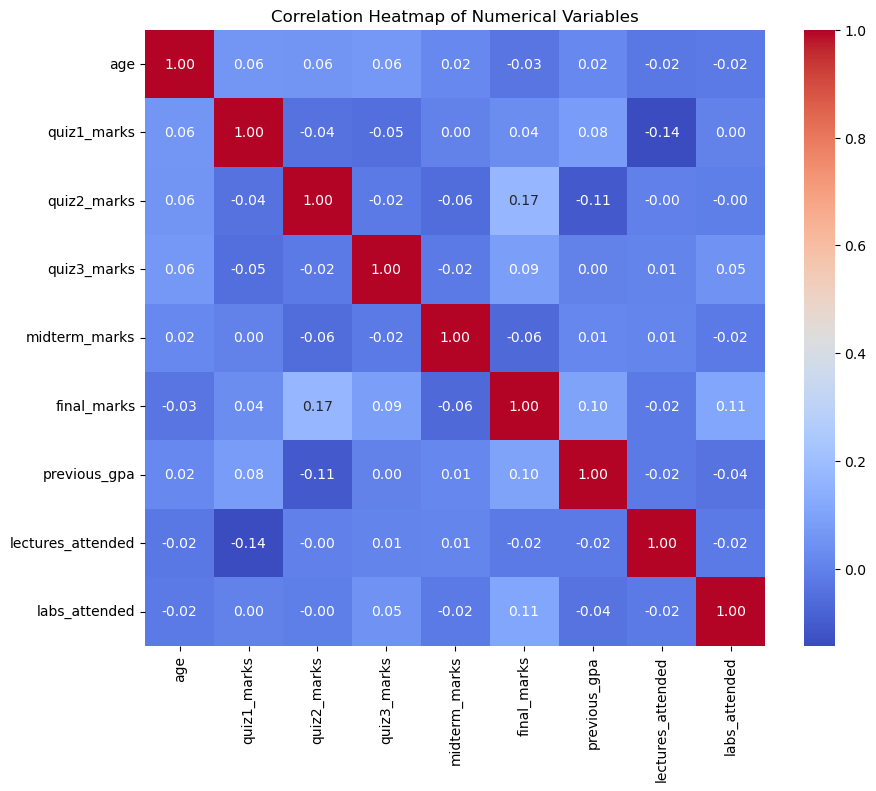

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

There's a strong correlation between Quiz 2 marks and Final Exam marks (0.17), which means that Quiz 2 is a good indicator of overall course success. There is also moderate negative correlation between Lectures Attended and Quiz 1 marks (-0.14), meaning students who attended more lectures tended to score lower on that initial quiz. Overall, most other variables, including age and previous GPA, show a very weak relationship (close to 0) with specific test scores.

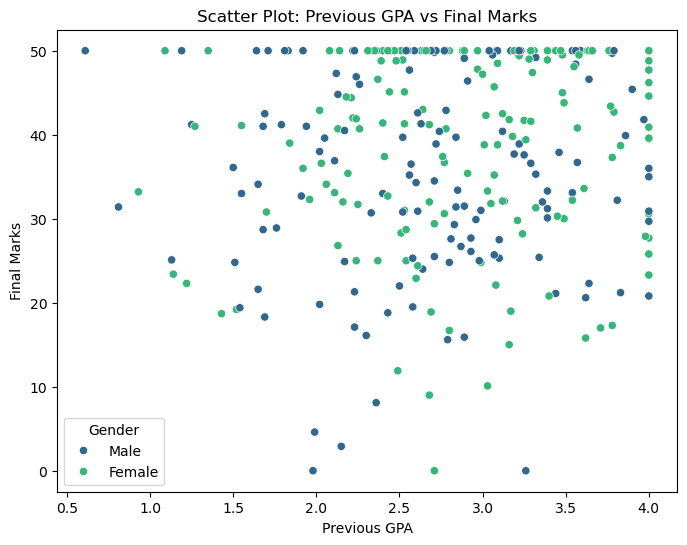

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='previous_gpa',
    y='final_marks',
    hue='gender',
    data=df,
    palette='viridis'
)

plt.title('Scatter Plot: Previous GPA vs Final Marks')
plt.xlabel('Previous GPA')
plt.ylabel('Final Marks')
plt.legend(title='Gender')
plt.show()

The scatter plot shows a weak relationship between a student's previous GPA and their Final Marks. This means a student's past performance is not a strong predictor of their success in this specific course. However, most students, regardless of GPA, are clustered at the top of the scale (45-50 marks). This suggests that the current course's teaching and student effort are more influential on final success than past academic history.

Being male or female also does not make a difference in how well their past GPA predicts their final marks.

### 3. Data Transformation & PCA


In [18]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing numerical columns:")
df_transformed.head()

DataFrame after standardizing numerical columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638


In [19]:
pca = PCA(n_components=10) 

pca.fit_transform(df_transformed)

array([[ 0.97007566, -0.2512717 , -0.25805316, ..., -0.85514088,
         0.45257755,  0.12896213],
       [ 0.45724346, -1.36835954, -1.83594652, ..., -0.2551258 ,
         0.22929964,  0.80266358],
       [ 1.96403679, -1.12191215,  1.15890334, ...,  1.86424152,
         0.21494869, -0.84807189],
       ...,
       [-1.45037555,  1.72779316, -0.85169893, ...,  2.05382793,
        -0.84592089,  0.09354937],
       [-0.19650367, -0.58542457, -1.07754827, ..., -0.28224409,
        -1.59742038,  1.04536431],
       [-0.4313977 ,  0.12781585, -0.27204428, ..., -0.95386868,
        -0.22568525, -0.57699358]])

In [20]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

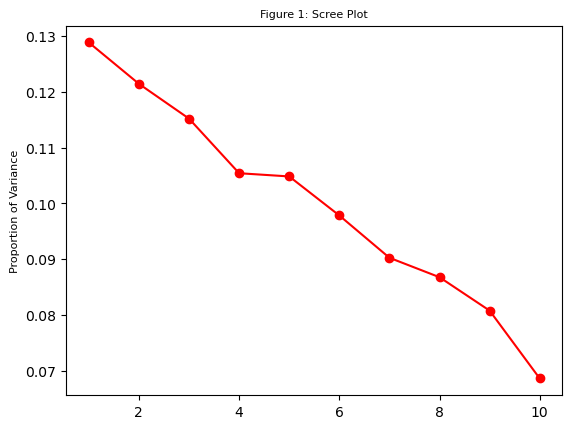

In [21]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [22]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%


Based on the result, the 8 principal components account for 12.88% + 12.14% + 11.52% + 10.54% + 10.48% + 9.78% + 9.03% + 8.68% = 85.06% of the variance in the data.

Since 85.06% is a considerable amount, it is sufficient to retain the eight principal components in the analysis.

We reduced using the columns for modeling from 10 to 8 only.

In [23]:
pca = PCA(n_components=8)
PC = pca.fit_transform(df_transformed)

In [25]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4' , 'PC5' , 'PC6' , 'PC7' , 'PC8' ])
df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.970076,-0.251272,-0.258053,-0.062800,0.222625,0.235991,-1.994340,-0.855141
1,0.457243,-1.368360,-1.835947,-0.729976,0.223127,1.337209,-0.170171,-0.255126
2,1.964037,-1.121912,1.158903,-2.088251,-0.433858,-0.993234,-0.394735,1.864242
3,0.905380,1.742435,-0.160315,1.173438,0.828061,-1.455974,-1.314544,-0.528984
4,0.263028,0.942491,0.606325,-0.768840,-0.450677,1.027836,0.575022,0.855673


In [26]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


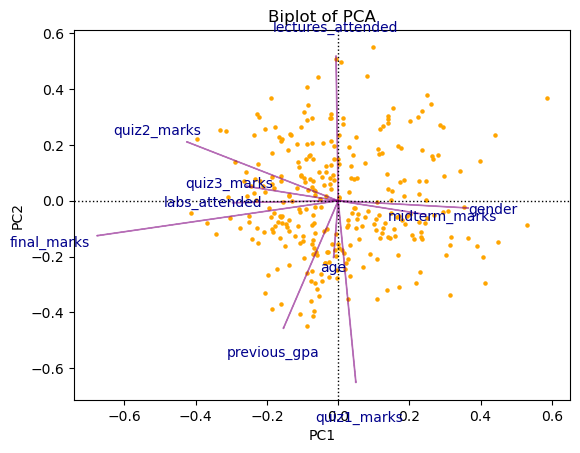

In [27]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

1. What does PC1 represent?

PC 1 represents overall student performance.

Students with high scores in Midterm Marks and Gender (variables pointing right) score high on PC1.

Since gender Male is coded 1, a high positive score on PC1 likely means students who are Male tend to have higher PC1 scores.

Students with high scores in Final Marks, Quiz 2 Marks, and Quiz 3 Marks (variables pointing left) score low on PC1.

2. What does PC2 represent?

PC2 represents an academic behavior and prior success contrast.

Students who score high (positive) on PC2 are those more aligned with the lectures_attended vector (pointing up). This means they tend to be the students who attend more lectures.

Students who score low on PC2 are those more aligned with the previous_gpa and quiz1_marks vectors (pointing down). This means they tend to be students with a higher previous GPA and higher Quiz 1 marks.

### 4. Clustering (KMeans & Agglomerative)

c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

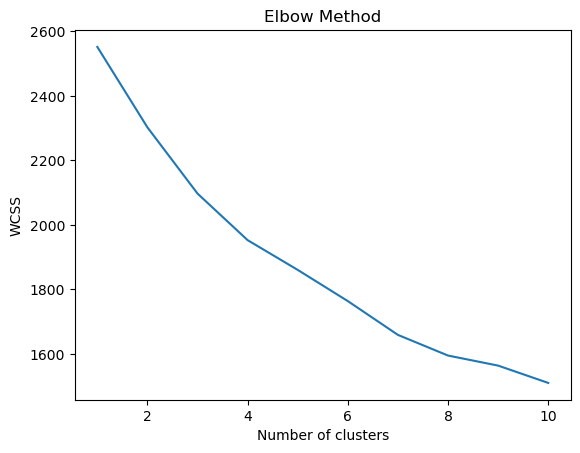

In [29]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2551.662715
1                   2  2302.291126
2                   3  2097.107129
3                   4  1952.708394
4                   5  1860.515083
5                   6  1763.806878
6                   7  1659.037766
7                   8  1595.024202
8                   9  1563.845563
9                  10  1510.186332


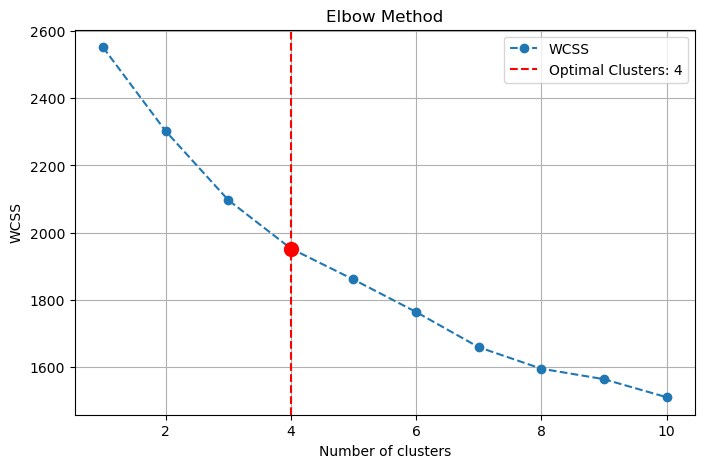

The optimal number of clusters is: 4


In [31]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [32]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [33]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.10373863440575626


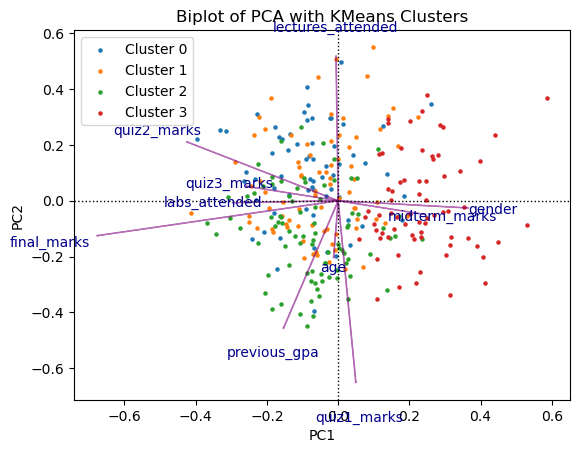

In [34]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

Result is 4 clusters with a silhouette score of 0.10

### 5. Cluster Profiling & Educational Recommendations

Cluster 0 — High Achievement in Final/Quizzes (Blue)

Characterised by
- Positioned around the left top, positive of PC 2, negative of PC1
- Higher quiz2_marks, quiz3 marks and final marks compared to Cluster 3
- Also have higher lecture attendances

Interpretation:

Cluster 0 represents high performing students who excel in the majority of assessments, particularly the final exam and later quizzes. These students also tend to have high lecture attendance, suggesting that for this group, attendance is a positive contributing factor to success.

Recommendation:
- Analyze the learning strategies of this group and share with other students.
- Ensure the material covered for quiz 1 is structured and complete so students can also achieve good score in quiz 1.
- Mentoring and group studies to achieve better midterm marks.

----------------

Cluster 1 — Consistent Performance (Orange)

Characterised by
- Overall are positioned around the middle, near 0 for PC1 and PC2
- Moderate performance in all aspects, some score high in quiz2_marks and midterm marks.

Interpretation:

Cluster 1 represents the average or consistent student who achieves moderate results across all academic metrics.
They are neither significantly high-performing nor struggling, and their past GPA and attendance are average.

Recommendation:
- Focus on mentoring for this group as they havve potential to score higher
- Provide feedback on specific weak areas from quizzes and midterm to boost final performance.
- Students are encourage to learn from high performing students too

------------------------------

Cluster 2 — Prior Success with Lower Attendance (Green)

Characterised by
- Positioned around the left bottom, negative PC 2 and PC 1 values
- Has a good track record, with high previous GPA but very low lecture attendance
- Also has good score in quizzes and final marks, lab attended good but low midterm marks.

Interpretation:

Cluster 2 represents the high-achieving student with strong prior academic. Their success is likely driven by their strong previous GPA (prior knowledge) and good initial performance (Quiz 1), but they tend to have lower lecture attendance. 

Recommendation:
- Acknowledge that this group can succeed without perfect attendance.
- Ensure lectures are stimulating enough to motivate these highly capable students to attend, perhaps by focusing on advanced applications or interactive problem-solving.
- Mentoring and group studies too, to improve midterm marks.

------------------

Cluster 3 — Struggling/High Midterm Focus (Red)

Characterised by
- Positioned around the right
- Has a good midterm_marks but low scores at quizzes and final marks, and low labs attended
-Has igh lectures attendances too but low previous gpa

Interpretation:

Cluster 3 represents struggling students who may have a slightly better midterm than their final/quiz scores suggest.
Crucially, this group has the highest lecture attendance but a low previous GPA. They are putting in the effort (attending class) but are not translating attendance into high marks, especially on the final exam.

Recommendation:
- Immediate to help this students with study skills, time management, and assessment preparation. Their attendance shows effort, but they are inefficient learners.
- Offer one-on-one tutoring or mandatory study groups to convert attendance effort into better grades.
- Encourage students to also attend lab